# Table interactive plot

In previous tutorials we showed how to plot the data as well as some widgets which are a part of the table object. In this tutorial, we show how an interactive plot can be built.

Let us demonstrate plotting using the data from an example file:

In [1]:
import os

import ubermagtable as ut

# Sample OOMMF .odt file
dirname = os.path.join('..', 'ubermagtable', 'tests', 'test_sample')
odtfile = os.path.join(dirname, 'oommf-old-file2.odt')

table = ut.Table.fromfile(odtfile, x='t')

By calling `mpl` method, default plot is shown:

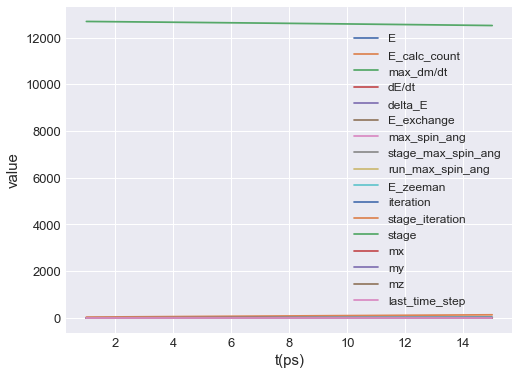

In [2]:
table.mpl()

By default, all data columns are plotted. To select only certain data columns, `y` can be passed. `y` is a list of strings, where each string matches one of the columns. For instance, if we want to plot the average magnetisation components, the plot is:

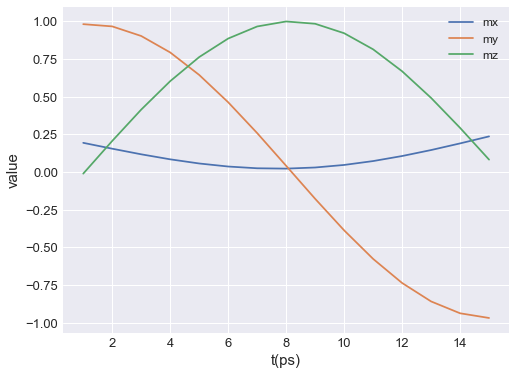

In [3]:
table.mpl(y=['mx', 'my', 'mz'])

Now, let us say we want to interactively choose data columns we want to plot on y-axis of the plot. We start by putting our plotting inside a function and exposing the argument we want to choose:

In [4]:
def my_interactive_plot(y):
    table.mpl(y=y)

Having the function defined, we have to call it with required `yaxis` argument in order to get the plot. For example,

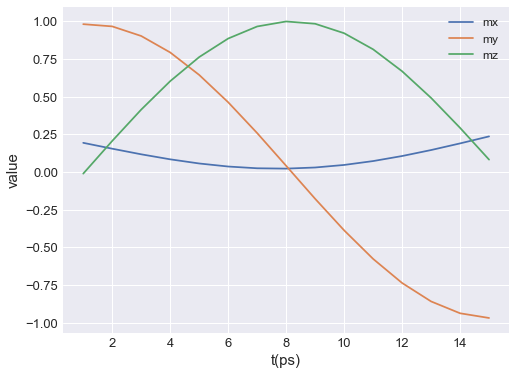

In [5]:
my_interactive_plot(y=['mx', 'my', 'mz'])

To interactively change the values of `yaxis`, we have to:

1. decorate the function using `ubermagtable.interact` and
2. assign a widget to the `yaxis` in the `ubermagtable.interact` argument list.

interactive(children=(SelectMultiple(description='y-axis:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

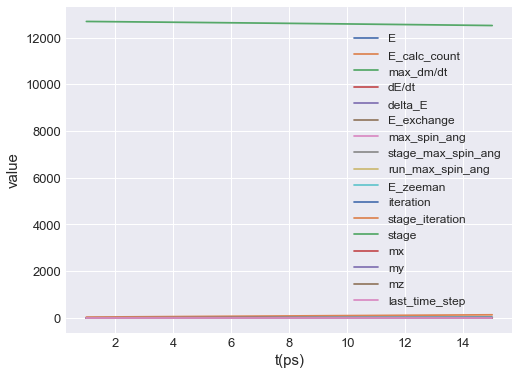

In [6]:
# NBVAL_IGNORE_OUTPUT
@ut.interact(y=table.selector())
def my_interactive_plot(y):
    table.mpl(y=y)

The plot, together with a selector widget is shown. In order to select multiple data columns from the widget list, we hold `Ctrl` (Windows, Linux) or `Cmd` (MacOS) and select multiple data columns.

Another argument of the plot we can interact with is the range of time values on the horizontal axis. For that, we have to expose `xlim` and assign it a slider widget.

interactive(children=(SelectMultiple(description='y-axis:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

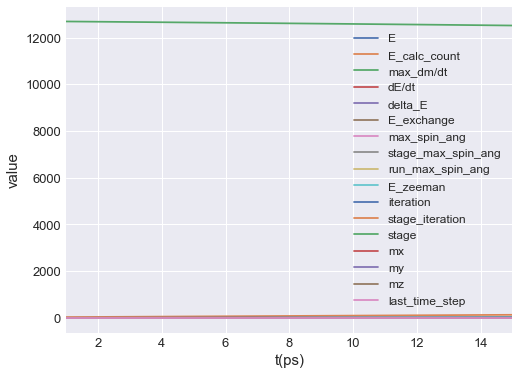

In [7]:
# NBVAL_IGNORE_OUTPUT
@ut.interact(y=table.selector(),
             xlim=table.slider())
def my_interactive_plot(y, xlim):
    table.mpl(y=y, xlim=xlim)

This way, by exposing the axes and passing any allowed `matplotlib.pyplot.plot` argument, we can customise the plot any way we like (as long as it is allowed by `matplotlib`).